## Structure Function for AGN variability on varying time lags
https://iopscience.iop.org/article/10.1088/0004-637X/696/2/1241

$SF(\tau) = \sqrt{\langle | m_{t}-m_{t-\tau}|^{2} \rangle - \langle \sigma^{2} \rangle }$

* t = time
* $m_{t}$- $m_{t-\tau}$ = difference in apparent magnitude of a candidate at two different times of observation
* $\tau$ = time lag
* $\sigma$ = noise

In [46]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [139]:
fnm = '../../transients_science/all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [140]:
candLC_mjd

array([59307.030411, 59310.089167, 59313.083839, ..., 60157.35623 ,
       60157.344809, 60157.342194])

In [101]:
fnm = '../../transients_science/all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

In [180]:
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 360)) &
              ((paramLC_tspan_r >= 360) & (paramLC_tspan_i >= 360))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 40)))[0]
print('Number of potential AGN in COSMOS: ',len(tx))
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 360)) &
              ((paramLC_tspan_r >= 360) & (paramLC_tspan_i >= 360))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 40)))[0]
print('Number of potential AGN in ELAIS: ',len(tx))
del tx

Number of potential AGN in COSMOS:  138
Number of potential AGN in ELAIS:  81


In [181]:
import pandas as pd


tx = np.where((((paramLC_tspan_g >= 360)) &
              ((paramLC_tspan_r >= 360) & (paramLC_tspan_i >= 360))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 40)))[0]
paramLC_candid[tx[0]]
tx2 = np.where((candLC_candid == paramLC_candid[tx]) & (candLC_filter == 'g'))
gdf = pd.DataFrame({'name': candLC_candid[tx2],
                  'mag': candLC_mag[tx2],
                  'mage':candLC_mage[tx2], 
                  'filter': candLC_filter[tx2],
                  'mjd': candLC_mjd[tx2]})
del tx

tx = np.where(candLC_filter == 'r')
rdf = pd.DataFrame({'name': candLC_candid[tx],
                  'mag': candLC_mag[tx],
                  'mage':candLC_mage[tx], 
                  'filter': candLC_filter[tx],
                  'mjd': candLC_mjd[tx]})
del tx

tx = np.where(candLC_filter == 'i')
idf = pd.DataFrame({'name': candLC_candid[tx],
                  'mag': candLC_mag[tx],
                  'mage':candLC_mage[tx], 
                  'filter': candLC_filter[tx],
                  'mjd': candLC_mjd[tx]})
del tx

/tmp/ipykernel_1870368/1667192441.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  tx2 = np.where((candLC_candid == paramLC_candid[tx]) & (candLC_filter == 'g'))


In [182]:
tx = np.where((((paramLC_tspan_g >= 360)) &
              ((paramLC_tspan_r >= 360) & (paramLC_tspan_i >= 360))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 40)))[0]
len(paramLC_candid[tx])

219

In [183]:
np.where((candLC_candid == paramLC_candid[tx]))

/tmp/ipykernel_1870368/3210196040.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np.where((candLC_candid == paramLC_candid[tx]))


(array([], dtype=int64),)

In [184]:
candLC_mjd[-1]

60157.342194

In [185]:
gdf.(['])

SyntaxError: unterminated string literal (detected at line 1) (3270164097.py, line 1)

In [186]:
tx = np.where((candLC_candid == 'DC21baaa') & (candLC_filter == 'g'))
dc21baaa_mag_g = candLC_mag[tx]
dc21baaa_mjd_g = candLC_mjd[tx]
dc21baaa_g = list(zip(dc21baaa_mag_g, dc21baaa_mjd_g))
dc21baaa_g
# gg = gdf[['name', 'mag', 'mjd']].to_numpy()[tx]
# gg

[(22.949, 59307.030411),
 (22.988, 59310.089167),
 (22.966, 59313.083839),
 (22.728, 59316.064882),
 (22.459, 59319.084752),
 (22.41, 59322.090266),
 (23.023, 59337.005624),
 (22.869, 59343.046074),
 (22.849, 59346.076016),
 (22.572, 59348.99943),
 (22.419, 59369.989038),
 (22.777, 59372.960729),
 (22.503, 59375.990669),
 (22.693, 59699.075342),
 (22.478, 59962.275992),
 (22.466, 59968.253514),
 (22.502, 59971.23812),
 (22.692, 60052.131558),
 (22.558, 60085.016451)]

In [187]:
dc21baaa_g

[(22.949, 59307.030411),
 (22.988, 59310.089167),
 (22.966, 59313.083839),
 (22.728, 59316.064882),
 (22.459, 59319.084752),
 (22.41, 59322.090266),
 (23.023, 59337.005624),
 (22.869, 59343.046074),
 (22.849, 59346.076016),
 (22.572, 59348.99943),
 (22.419, 59369.989038),
 (22.777, 59372.960729),
 (22.503, 59375.990669),
 (22.693, 59699.075342),
 (22.478, 59962.275992),
 (22.466, 59968.253514),
 (22.502, 59971.23812),
 (22.692, 60052.131558),
 (22.558, 60085.016451)]

In [193]:
dc21baaa_mag_g_diff = []
dc21baaa_mjd_g_diff = []
dc21baaa_sf = []
for i in range(len(dc21baaa_g)):
    if i < (len(dc21baaa_g)-1):
        for j in range(i+1, len(dc21baaa_g)):
            mag_diff = abs(dc21baaa_g[i][0] - dc21baaa_g[j][0])
            # sf = np.sqrt(np.average(mag_diff**2))
            mjd_diff = abs(dc21baaa_g[i][1] - dc21baaa_g[j][1])
            dc21baaa_mag_g_diff.append(abs(mag_diff))
            # dc21baaa_sf.append(sf)
            dc21baaa_mjd_g_diff.append(abs(mjd_diff))
# sf = np.sqrt(np.average(mag_diff**2))
# dc21baaa_sf.append(sf)

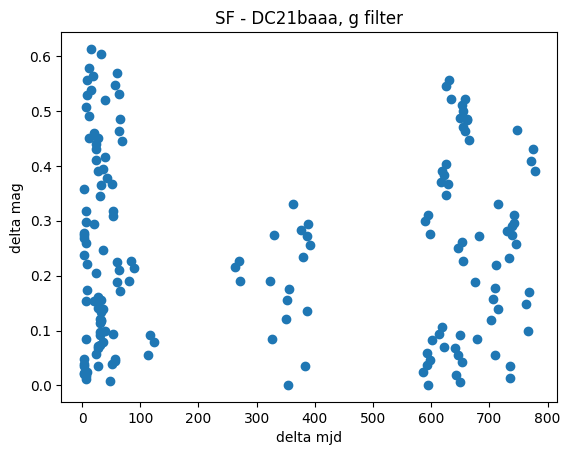

In [199]:
plt.scatter((dc21baaa_mjd_g_diff), (dc21baaa_mag_g_diff))
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("delta mjd")
plt.ylabel("delta mag")
plt.title("SF - DC21baaa, g filter");

This is incomplete. In order to calculate SF, I will need to use binning for the delta times to average over ranges of delta mags.

In [197]:
# plt.scatter((dc21baaa_mjd_g_diff), (dc21baaa_sf))
# # plt.xscale("log")
# # plt.yscale("log")
# plt.xlabel("delta mjd")
# plt.ylabel("delta mag")
# plt.title("SF - DC21baaa, g filter");

In [198]:
dc21baaa_mjd_g_diff[:5]

[3.0587559999985388,
 6.053427999999258,
 9.03447099999903,
 12.05434100000275,
 15.059854999999516]